In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [2]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-060821','gfdl.ncrc4-intel16-prod'
control='OM4p5_CORE2_IAF_gzCOBALT-Control-062321'

In [3]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
short_casename

'gzCOBALT-060821'

In [4]:
phyto_varlist = ['di', 'smp', 'lgp']
#zoo_varlist = ['smz', 'mdz', 'lgz']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [5]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821


In [6]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-060821/ocean_cobalt_fdet_100.1988-2007.10.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-0

In [7]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [8]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [9]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
print(c_files)

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
    print(files)


temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321
['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.

In [10]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [11]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [12]:
def abline(slope, intercept, **kwargs):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', **kwargs)

## Tunicates vs. Microzooplankton, ratio to phytoplankton production

In [13]:
frac_smt_pp=(ds.jprod_nsmt_100.mean(dim='time') / ds.intpp.mean(dim='time'))
frac_smz_pp=(ds.jprod_nsmz_100.mean(dim='time') / ds.intpp.mean(dim='time'))

frac_smt_pp=frac_smt_pp.rename('frac_smt_pp')
frac_smz_pp=frac_smz_pp.rename('frac_smz_pp')


Text(0, 0.5, 'Fraction of Microzooplankton Production from Primary Production')

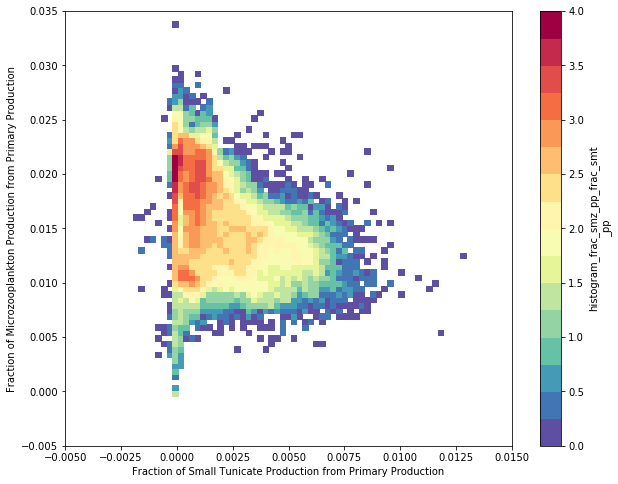

In [14]:
plt.figure(figsize=(10, 8))
x=frac_smt_pp
y=frac_smz_pp

xbins=np.linspace(-0.005,0.015,80)
ybins=np.linspace(-0.005,0.035,80)

hT=histogram(y,x,bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')

plt.xlabel('Fraction of Small Tunicate Production from Primary Production')
plt.ylabel('Fraction of Microzooplankton Production from Primary Production')

In [15]:
frac_smt_lgp=(ds.jprod_nsmt_100.mean(dim='time') / ds.jprod_nlgp_100.mean(dim='time'))
frac_smz_lgp=(ds.jprod_nsmz_100.mean(dim='time') / ds.jprod_nlgp_100.mean(dim='time'))

frac_smt_lgp=frac_smt_lgp.rename('frac_smt_lgp')
frac_smz_lgp=frac_smz_lgp.rename('frac_smz_lgp')

Text(0, 0.5, 'Ratio of Microzooplankton Production to Large Phytoplankton Production (log scale)')

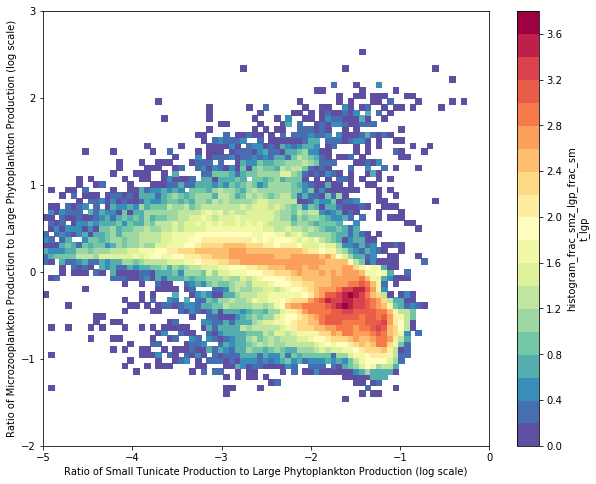

In [16]:
plt.figure(figsize=(10, 8))
x=frac_smt_lgp
y=frac_smz_lgp

xbins=np.linspace(-5,0,80)
ybins=np.linspace(-2,3,80)

hT=histogram(np.log10(y),np.log10(x),bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')
plt.xlabel('Ratio of Small Tunicate Production to Large Phytoplankton Production (log scale)')
plt.ylabel('Ratio of Microzooplankton Production to Large Phytoplankton Production (log scale)')

In [17]:
frac_tun_smp=(ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time'))/ ds.jprod_nsmp_100.mean(dim='time')
frac_smz_smp=(ds.jprod_nsmz_100.mean(dim='time') / ds.jprod_nsmp_100.mean(dim='time'))

frac_tun_smp=frac_tun_smp.rename('frac_tun_smp')
frac_smz_smp=frac_smz_smp.rename('frac_smz_smp')

Text(0, 0.5, 'Ratio of Microzooplankton Production to Small Phytoplankton Production (log scale)')

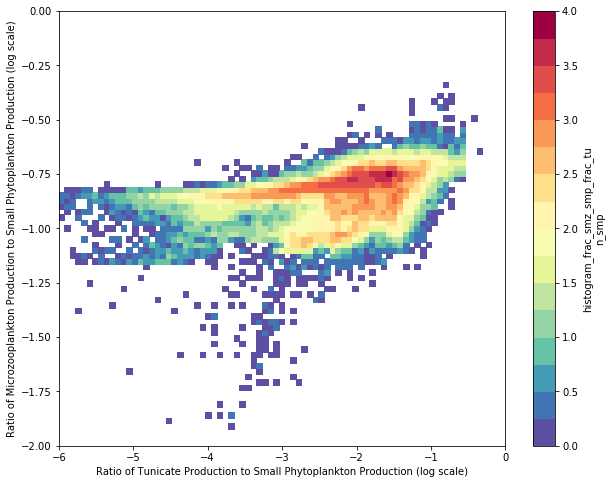

In [18]:
plt.figure(figsize=(10, 8))
x=frac_tun_smp
y=frac_smz_smp

xbins=np.linspace(-6,0,80)
ybins=np.linspace(-2,0,80)

hT=histogram(np.log10(y),np.log10(x),bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')
plt.xlabel('Ratio of Tunicate Production to Small Phytoplankton Production (log scale)')
plt.ylabel('Ratio of Microzooplankton Production to Small Phytoplankton Production (log scale)')

## Microzooplankton vs. Mesozooplankton relationship to export fluxes

In [19]:
frac_smz_pp=(ds.jprod_nsmz_100.mean(dim='time') / ds.intpp.mean(dim='time'))
pe_ratio = ds.fndet_100.mean(dim='time') / ds.intpp.mean(dim='time')

frac_smz_pp=frac_smz_pp.rename('frac_smz_pp')
pe_ratio = pe_ratio.rename('pe_ratio')

Text(0, 0.5, 'pe-ratio')

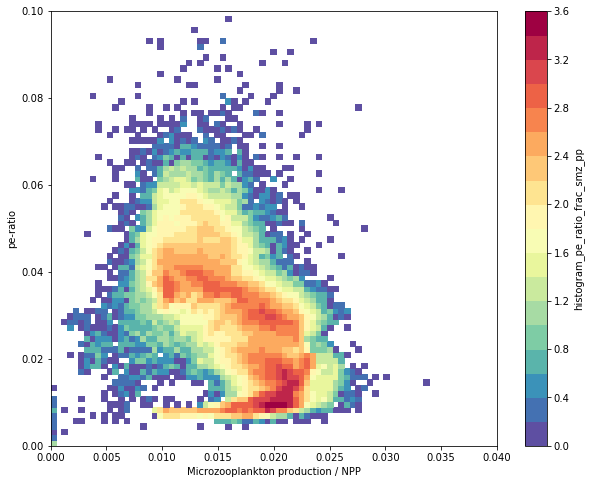

In [20]:
plt.figure(figsize=(10, 8))
x=frac_smz_pp
y=pe_ratio

xbins=np.linspace(0,0.04,80)
ybins=np.linspace(0,.1,80)

hT=histogram(y,x,bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')
plt.xlabel('Microzooplankton production / NPP')
plt.ylabel('pe-ratio')

In [21]:
frac_mesoz_pp=(ds.jprod_nmdz_100.mean(dim='time') + ds.jprod_nlgz_100.mean(dim='time')) / ds.intpp.mean(dim='time')
pe_ratio = ds.fndet_100.mean(dim='time') / ds.intpp.mean(dim='time')

frac_mesoz_pp=frac_mesoz_pp.rename('frac_mesoz_pp')
pe_ratio = pe_ratio.rename('pe_ratio')

Text(0, 0.5, 'pe-ratio')

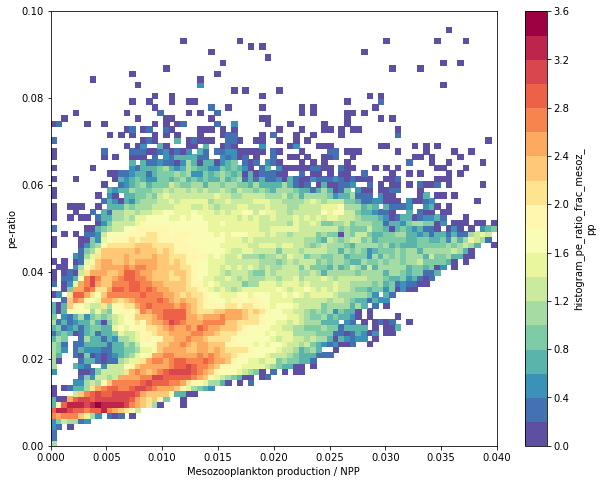

In [22]:
plt.figure(figsize=(10, 8))
x=frac_mesoz_pp
y=pe_ratio

xbins=np.linspace(0,0.04,80)
ybins=np.linspace(0,.1,80)

hT=histogram(y,x,bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')
plt.xlabel('Mesozooplankton production / NPP')
plt.ylabel('pe-ratio')

Microzooplankton have a negative relationship to pe-ratio; mesozooplankton have a positive relationship. Tunicates are closer to mesozooplankton than microzooplankton.

In [23]:
frac_tun_pp=(ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time')) / ds.intpp.mean(dim='time')
pe_ratio = ds.fndet_100.mean(dim='time') / ds.intpp.mean(dim='time')

frac_tun_pp=frac_tun_pp.rename('frac_tun_pp')
pe_ratio = pe_ratio.rename('pe_ratio')

Text(0, 0.5, 'pe-ratio')

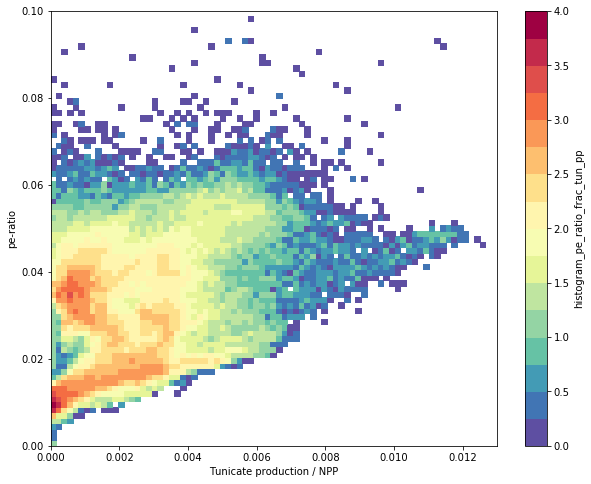

In [24]:
plt.figure(figsize=(10, 8))
x=frac_tun_pp
y=pe_ratio

xbins=np.linspace(0,0.013,80)
ybins=np.linspace(0,.1,80)

hT=histogram(y,x,bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')

plt.xlabel('Tunicate production / NPP')
plt.ylabel('pe-ratio')

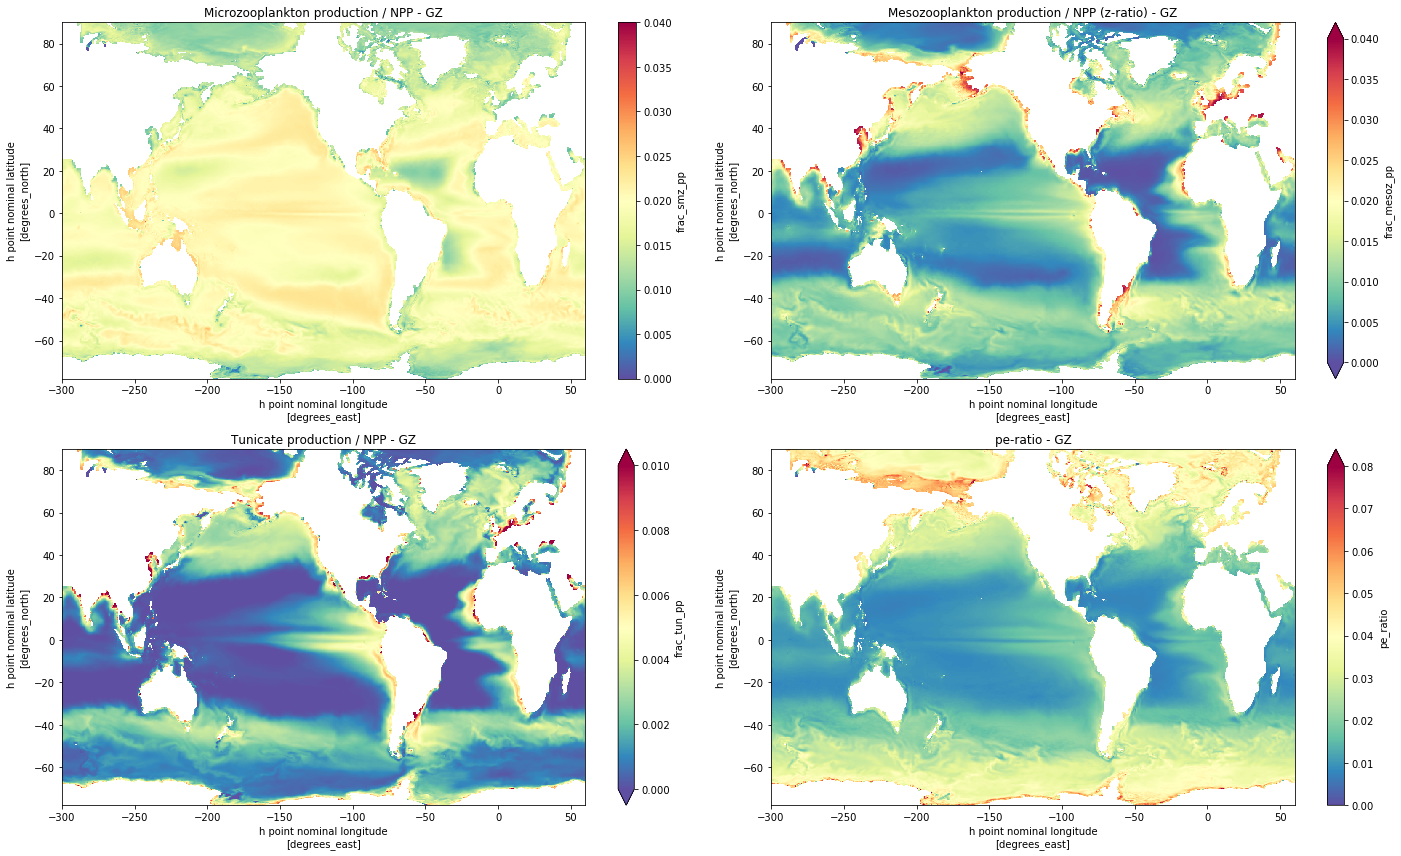

In [25]:
fig=plt.figure(figsize=(20,12))
gs=gridspec.GridSpec(2,2)

fig.add_subplot(gs[0,0])
frac_smz_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.04)
plt.title('Microzooplankton production / NPP - GZ')

fig.add_subplot(gs[0,1])
frac_mesoz_pp.plot(cmap='Spectral_r', vmin=0.0,vmax=0.04)
plt.title('Mesozooplankton production / NPP (z-ratio) - GZ')

fig.add_subplot(gs[1,0])
frac_tun_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.01)
plt.title('Tunicate production / NPP - GZ')

fig.add_subplot(gs[1,1])
pe_ratio.plot(cmap='Spectral_r', vmin=0.0,vmax=0.08)
plt.title('pe-ratio - GZ')

plt.tight_layout()


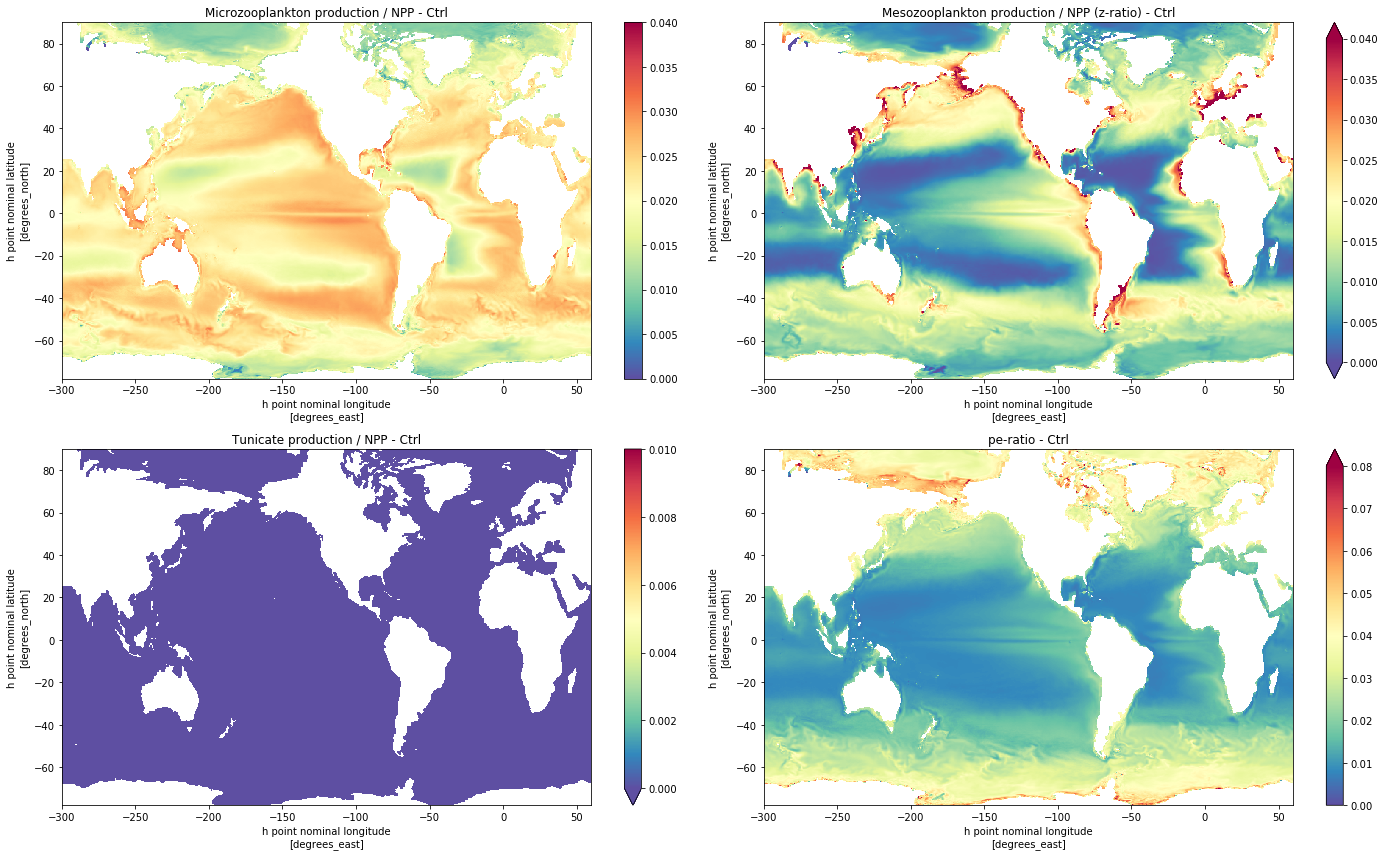

In [27]:
c_frac_smz_pp=(dc.jprod_nsmz_100.mean(dim='time') / dc.intpp.mean(dim='time'))
c_frac_mesoz_pp=(dc.jprod_nmdz_100.mean(dim='time') + dc.jprod_nlgz_100.mean(dim='time')) / ds.intpp.mean(dim='time')
c_frac_tun_pp=(dc.jprod_nsmt_100.mean(dim='time') + dc.jprod_nlgt_100.mean(dim='time')) / ds.intpp.mean(dim='time')
c_pe_ratio = dc.fndet_100.mean(dim='time') / dc.intpp.mean(dim='time')

fig=plt.figure(figsize=(20,12))
gs=gridspec.GridSpec(2,2)

fig.add_subplot(gs[0,0])
c_frac_smz_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.04)
plt.title('Microzooplankton production / NPP - Ctrl')

fig.add_subplot(gs[0,1])
c_frac_mesoz_pp.plot(cmap='Spectral_r', vmin=0.0,vmax=0.04)
plt.title('Mesozooplankton production / NPP (z-ratio) - Ctrl')

fig.add_subplot(gs[1,0])
c_frac_tun_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.01)
plt.title('Tunicate production / NPP - Ctrl')

fig.add_subplot(gs[1,1])
c_pe_ratio.plot(cmap='Spectral_r', vmin=0.0,vmax=0.08)
plt.title('pe-ratio - Ctrl')

plt.tight_layout()


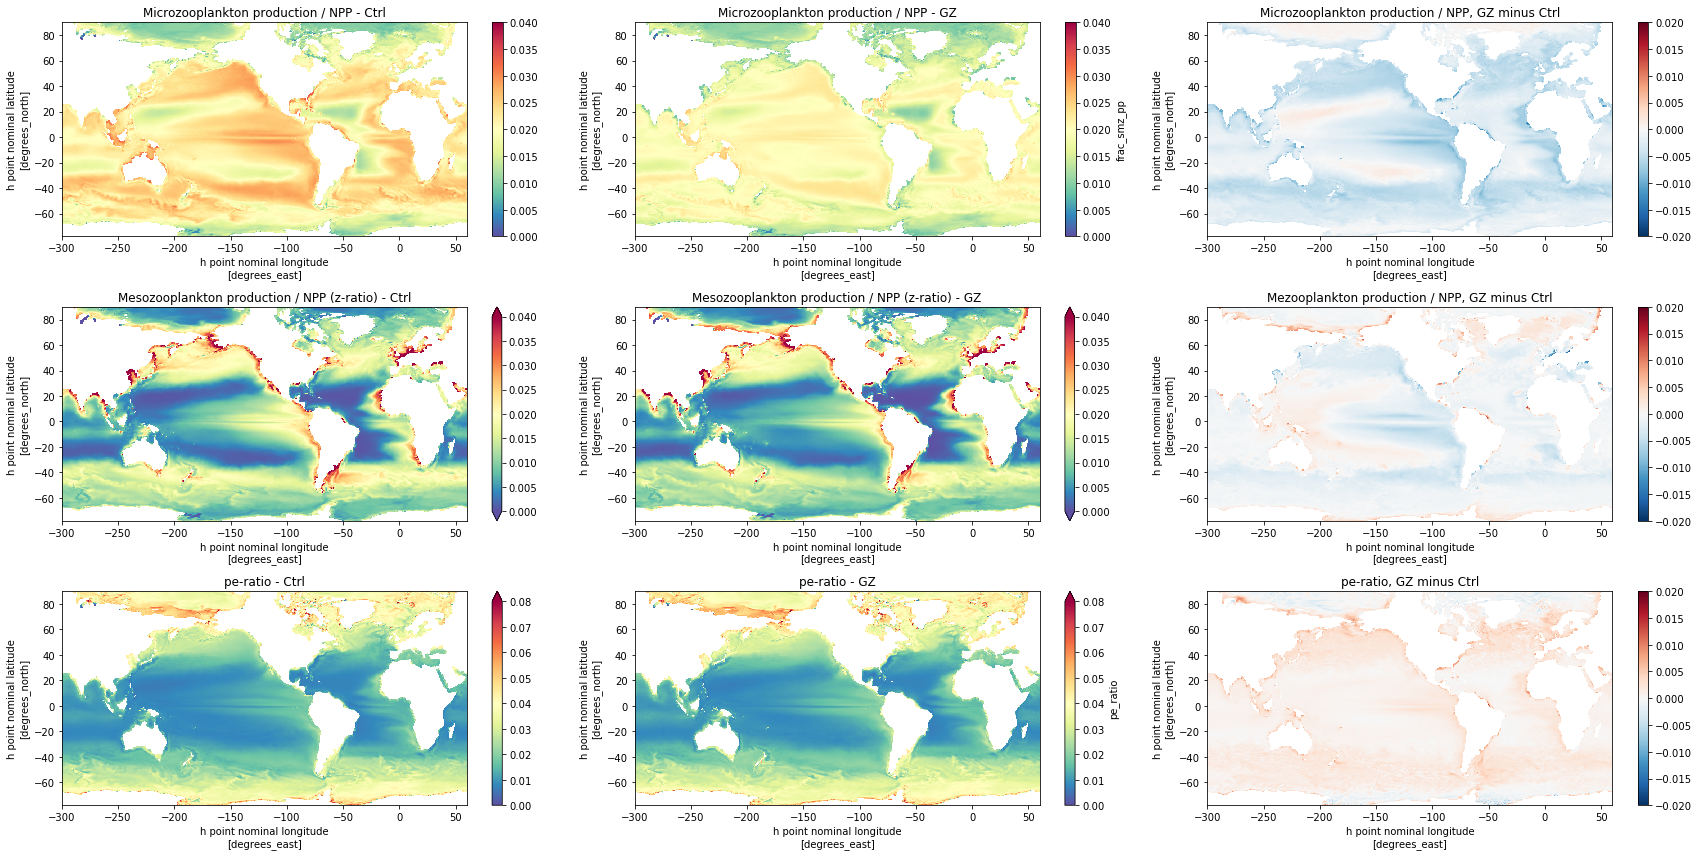

In [28]:
fig=plt.figure(figsize=(24,12))
gs=gridspec.GridSpec(3,3)

fig.add_subplot(gs[0,0])
c_frac_smz_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.04)
plt.title('Microzooplankton production / NPP - Ctrl')

fig.add_subplot(gs[0,1])
frac_smz_pp.plot(cmap='Spectral_r',vmin=0,vmax=0.04)
plt.title('Microzooplankton production / NPP - GZ')

fig.add_subplot(gs[0,2])
(frac_smz_pp - c_frac_smz_pp).plot(cmap='RdBu_r',vmin=-0.02,vmax=0.02)
plt.title('Microzooplankton production / NPP, GZ minus Ctrl')

##

fig.add_subplot(gs[1,0])
c_frac_mesoz_pp.plot(cmap='Spectral_r', vmin=0.0,vmax=0.04)
plt.title('Mesozooplankton production / NPP (z-ratio) - Ctrl')

fig.add_subplot(gs[1,1])
(frac_mesoz_pp+frac_tun_pp).plot(cmap='Spectral_r', vmin=0.0,vmax=0.04)
plt.title('Mesozooplankton production / NPP (z-ratio) - GZ')

fig.add_subplot(gs[1,2])
((frac_mesoz_pp+frac_tun_pp) - c_frac_mesoz_pp).plot(cmap='RdBu_r',vmin=-0.02,vmax=0.02)
plt.title('Mezooplankton production / NPP, GZ minus Ctrl')

##

fig.add_subplot(gs[2,0])
c_pe_ratio.plot(cmap='Spectral_r', vmin=0.0,vmax=0.08)
plt.title('pe-ratio - Ctrl')

fig.add_subplot(gs[2,1])
pe_ratio.plot(cmap='Spectral_r', vmin=0.0,vmax=0.08)
plt.title('pe-ratio - GZ')

fig.add_subplot(gs[2,2])
(pe_ratio - c_pe_ratio).plot(cmap='RdBu_r',vmin=-0.02,vmax=0.02)
plt.title('pe-ratio, GZ minus Ctrl')


plt.tight_layout()


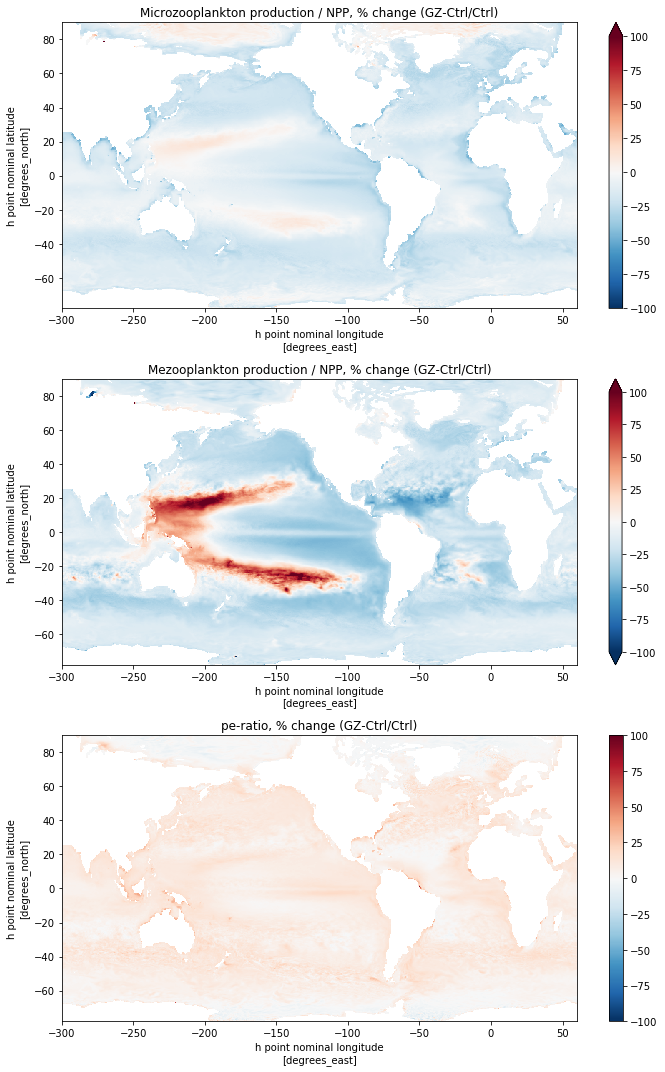

In [29]:
fig=plt.figure(figsize=(10,15))
gs=gridspec.GridSpec(3,1)

fig.add_subplot(gs[0,0])
(100*(frac_smz_pp - c_frac_smz_pp)/(c_frac_smz_pp)).plot(cmap='RdBu_r',vmin=-100,vmax=100)
plt.title('Microzooplankton production / NPP, % change (GZ-Ctrl/Ctrl)')

fig.add_subplot(gs[1,0])
(100*(frac_mesoz_pp - c_frac_mesoz_pp)/(c_frac_mesoz_pp)).plot(cmap='RdBu_r',vmin=-100,vmax=100)
plt.title('Mezooplankton production / NPP, % change (GZ-Ctrl/Ctrl)')

fig.add_subplot(gs[2,0])
(100*(pe_ratio - c_pe_ratio)/(c_pe_ratio)).plot(cmap='RdBu_r',vmin=-100,vmax=100)
plt.title('pe-ratio, % change (GZ-Ctrl/Ctrl)')

plt.tight_layout()

## Tunicates vs. Microzooplankton vs. Mesozooplankton

Tunicates have a negative relationship with microzooplankton

In [30]:
tot_zoo_prod = ds.jprod_nsmz_100.mean(dim='time') + ds.jprod_nmdz_100.mean(dim='time')+ ds.jprod_nlgz_100.mean(dim='time') + \
               ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time')

frac_tun_zoo=(ds.jprod_nsmt_100.mean(dim='time') + ds.jprod_nlgt_100.mean(dim='time'))/ tot_zoo_prod
frac_smz_zoo=(ds.jprod_nsmz_100.mean(dim='time') / tot_zoo_prod)

frac_tun_zoo=frac_tun_zoo.rename('frac_tun_zoo')
frac_smz_zoo=frac_smz_zoo.rename('frac_smz_zoo')

Text(0, 0.5, 'Contribution of Microzooplankton to total Zooplankton production')

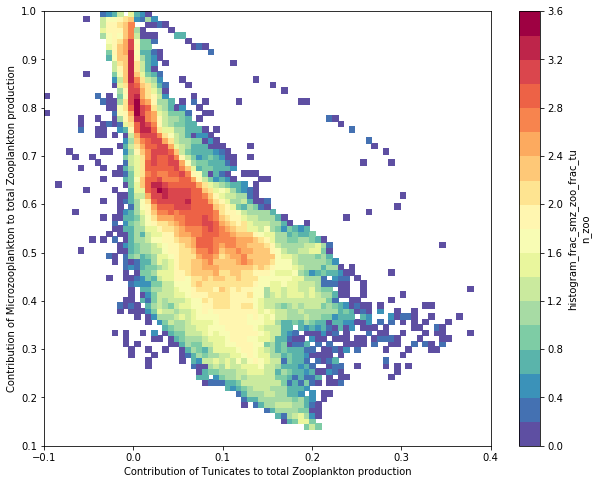

In [31]:
plt.figure(figsize=(10, 8))
x=frac_tun_zoo
y=frac_smz_zoo

xbins=np.linspace(-0.1,0.4,80)
ybins=np.linspace(0.1,1,80)

hT=histogram(y,x,bins=[ybins,xbins])
np.log10(hT).plot(levels=20, cmap='Spectral_r')
plt.xlabel('Contribution of Tunicates to total Zooplankton production')
plt.ylabel('Contribution of Microzooplankton to total Zooplankton production')

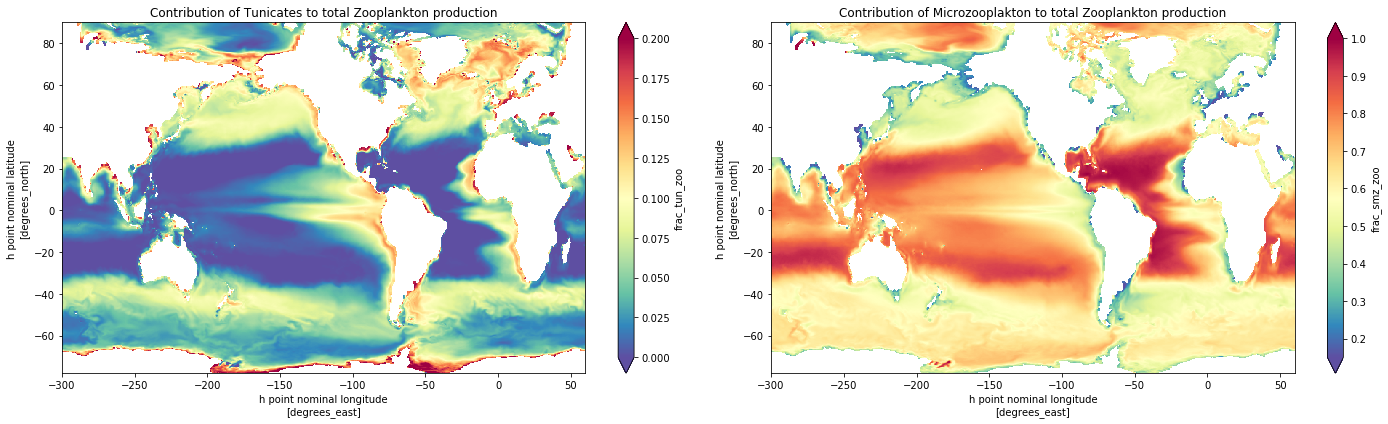

In [32]:
fig=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
frac_tun_zoo.plot(cmap='Spectral_r',vmin=0,vmax=0.2)
plt.title('Contribution of Tunicates to total Zooplankton production')

fig.add_subplot(gs[0,1])
frac_smz_zoo.plot(cmap='Spectral_r', vmin=0.15,vmax=1)
plt.title('Contribution of Microzooplakton to total Zooplankton production')

plt.tight_layout()


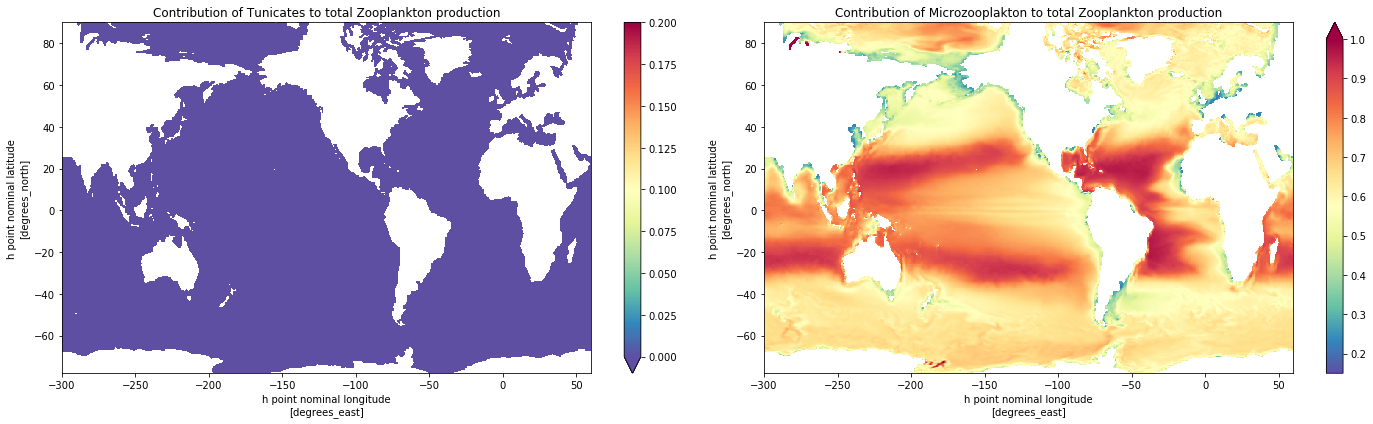

In [38]:

c_tot_zoo_prod = dc.jprod_nsmz_100.mean(dim='time') + dc.jprod_nmdz_100.mean(dim='time') + dc.jprod_nlgz_100.mean(dim='time') + \
                 dc.jprod_nsmt_100.mean(dim='time') + dc.jprod_nlgt_100.mean(dim='time')

c_frac_tun_zoo=(dc.jprod_nsmt_100.mean(dim='time') + dc.jprod_nlgt_100.mean(dim='time'))/ c_tot_zoo_prod
c_frac_smz_zoo=(dc.jprod_nsmz_100.mean(dim='time') / c_tot_zoo_prod)

fig=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(1,2)

fig.add_subplot(gs[0,0])
c_frac_tun_zoo.plot(cmap='Spectral_r',vmin=0,vmax=0.2)
plt.title('Contribution of Tunicates to total Zooplankton production')

fig.add_subplot(gs[0,1])
c_frac_smz_zoo.plot(cmap='Spectral_r', vmin=0.15,vmax=1)
plt.title('Contribution of Microzooplakton to total Zooplankton production')

plt.tight_layout()


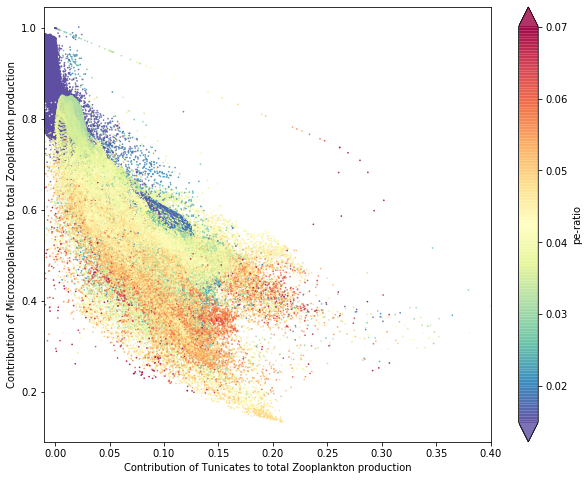

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(x=frac_tun_zoo.values.flatten(), y=frac_smz_zoo.values.flatten(), c=pe_ratio.values.flatten(), s=0.5, alpha=0.8, vmin=0.015,vmax=0.07, cmap='Spectral_r')
plt.xlim(-0.01,0.4)
plt.xlabel('Contribution of Tunicates to total Zooplankton production')
plt.ylabel('Contribution of Microzooplankton to total Zooplankton production')
plt.colorbar(extend='both', label='pe-ratio')

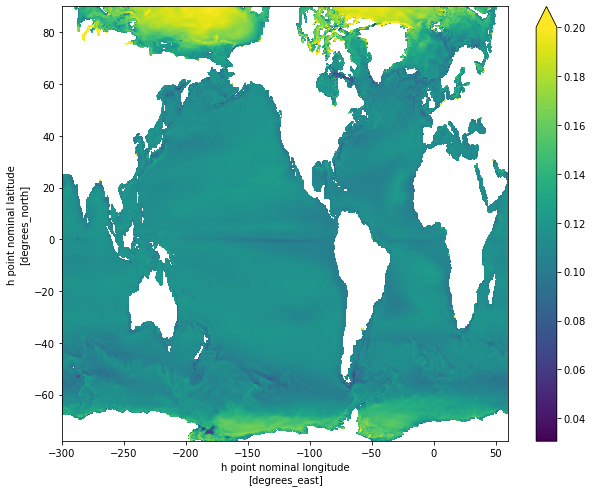

In [35]:
plt.figure(figsize=(10,8))
(ds.jprod_nbact_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time')).plot(vmax=0.2)

Text(0.5, 1.0, 'Bacterial Production Ratio (GZ minus Control)')

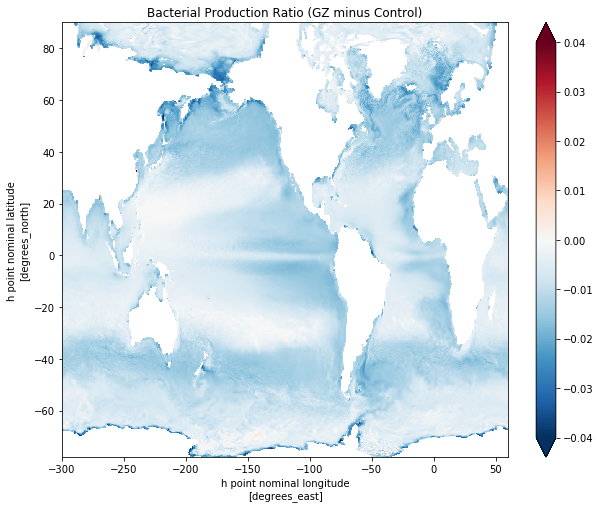

In [44]:
plt.figure(figsize=(10,8))
((ds.jprod_nbact_100.mean(dim='time') * 6.625 / ds.intpp.mean(dim='time'))-(dc.jprod_nbact_100.mean(dim='time') * 6.625 / dc.intpp.mean(dim='time'))).plot(vmin=-0.04, vmax=0.04, cmap='RdBu_r')
plt.title('Bacterial Production Ratio (GZ minus Control)')